# Creating the dataset:
Datset chosen is the Goodreads dataset found on Kaggle:
    Link: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
    
About the dataset:
This data was entirely scraped via the Goodreads API. 

Inspiration: 
The reason behind choosing this dataset is pretty straightforward, as I'm an avid reader and a book-lover. So exploring the book dataset irrespective of the language and publication, and use it to determine what what book to be reading next.


Aim:
The goal is to generate a dataset for the project, from the link above. The criteria is to have 100 rows randomly chosen from the main dataset and then to study the data to formulate a question and leverage the Wikidata kniowledge base to answer the formulated question.

### Query: "What genres of books have historically generated the highest reader engagement, and in what years were these highly engaging books predominantly published?"

In [1]:
import pandas as pd

In [2]:
books = pd.read_csv('books.csv', error_bad_lines=False)

C:\Users\ragib_rridy9t\AppData\Local\Temp\ipykernel_17740\458108474.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('books.csv', error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [3]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
import random

#Now I will sample 100 random rows from the dataframe

dataset = books.sample(n=100)

dataset.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
5921,22285,Rant,Chuck Palahniuk,3.81,0385517874,9780385517874,eng,320,55592,2516,5/1/2007,Doubleday Books
142,298,Treasure Island,Robert Louis Stevenson/N.C. Wyeth/Timothy Meis,3.83,0689854684,9780689854682,eng,64,104,14,7/1/2003,Atheneum Books for Young Readers
5581,20425,The Spiral Stair (Arabel and Mortimer #6),Joan Aiken/Quentin Blake,4.33,1903015073,9781903015070,eng,62,35,5,8/1/2000,Barn Owl Books
10897,44543,Slammerkin,Emma Donoghue,3.71,0156007479,9780156007474,eng,410,12551,1251,5/1/2002,Mariner Books
3401,12441,Traveller,Richard Adams,3.92,0440204933,9780440204930,eng,355,884,74,11/5/1989,Dell Publishing
4187,14990,Spook: Science Tackles the Afterlife,Mary Roach,3.58,0393329127,9780393329124,en-US,311,30473,2399,9/26/2006,W.W. Norton & Company (NYC)
1860,6613,Four Blondes,Candace Bushnell,2.82,080213825X,9780802138255,eng,256,23409,877,6/8/2001,Grove Press
6432,24213,Alice's Adventures in Wonderland & Through the...,Lewis Carroll/John Tenniel/Martin Gardner,4.07,0451527747,9780451527745,eng,239,381097,6041,12/1/2000,Penguin Group (USA)
10746,43877,The Monk Who Sold His Ferrari: A Fable About F...,Robin S. Sharma,3.83,0062515675,9780062515674,eng,208,71133,3741,4/21/1999,HarperOne
4663,16767,The Case of the Half-Wakened Wife,Erle Stanley Gardner,3.88,034537147X,9780345371478,eng,245,435,23,3/13/1991,Fawcett


Note: I am going to remove certain columns from the dataset, to simplify the dataset.

## Modify the Dataset

In [5]:
#Removing the columns, token_count	total_characters	protagonist_concentration	avg_sentence_length	avg_word_length	tuldava_score	event_count	speed_avg	circuitousness	speed_min	volume	goodreads_avg	total_ratings	goodreads_URL	Probability1P

dataset = dataset.drop(['bookID', 'isbn13', 'publication_date', 'language_code'], axis=1)

In [6]:
#Checking for missing values
dataset.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
  num_pages           0
ratings_count         0
text_reviews_count    0
publisher             0
dtype: int64

In [7]:
dataset.head(10)

,title,authors,average_rating,isbn,num_pages,ratings_count,text_reviews_count,publisher
5921,Rant,Chuck Palahniuk,3.81,0385517874,320,55592,2516,Doubleday Books
142,Treasure Island,Robert Louis Stevenson/N.C. Wyeth/Timothy Meis,3.83,0689854684,64,104,14,Atheneum Books for Young Readers
5581,The Spiral Stair (Arabel and Mortimer #6),Joan Aiken/Quentin Blake,4.33,1903015073,62,35,5,Barn Owl Books
10897,Slammerkin,Emma Donoghue,3.71,0156007479,410,12551,1251,Mariner Books
3401,Traveller,Richard Adams,3.92,0440204933,355,884,74,Dell Publishing
4187,Spook: Science Tackles the Afterlife,Mary Roach,3.58,0393329127,311,30473,2399,W.W. Norton & Company (NYC)
1860,Four Blondes,Candace Bushnell,2.82,080213825X,256,23409,877,Grove Press
6432,Alice's Adventures in Wonderland & Through the...,Lewis Carroll/John Tenniel/Martin Gardner,4.07,0451527747,239,381097,6041,Penguin Group (USA)
10746,The Monk Who Sold His Ferrari: A Fable About F...,Robin S. Sharma,3.83,0062515675,208,71133,3741,HarperOne
4663,The Case of the Half-Wakened Wife,Erle Stanley Gardner,3.88,034537147X,245,435,23,Fawcett


In [ ]:
#Lets check the data types of the columns

dataset.dtypes

In [8]:
#We will format the ISBN column in proper format
#As some of the isbn have 'X' at the end, we will remove it

dataset['isbn'] = dataset['isbn'].str.replace('X', '')


In [9]:
dataset['isbn'] = dataset['isbn'].astype(str)

## Exporting the dataset to CSV

In [ ]:
#Exporting the dataset to a csv file

dataset.to_csv('Book_dataset.csv', index=False)

## Query: 1
    In this query, the local data is queried, where a simple sort on the Average rating, displays the top 10 highest rated books.

```
  prefix owl: <http://www.w3.org/2002/07/owl#> 
  prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
  prefix xml: <http://www.w3.org/XML/1998/namespace> 
  prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
  prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
  PREFIX wod: <https://ecampus.paris-saclay.fr/wod/bhatt/>
  PREFIX wd: <http://www.wikidata.org/entity/>
  PREFIX wdt: <http://www.wikidata.org/prop/direct/>


  SELECT ?bookTitle ?author ?average_rating
  WHERE {
    ?book a wod:Book;
          rdfs:label ?bookTitle;       # Use ?bookTitle to bind the book title
          wod:authors ?author;
          wod:average_rating ?average_rating .
  }ORDER BY DESC(?average_rating)
  LIMIT 10
```

## Query:2 

It would be interesting to find out if these books also have a high engagement level. To find that out, we will use the Review Ratio. The ratio of text_reviews_count to ratings_count gives an idea of what proportion of readers felt compelled to leave a written review as opposed to simply leaving a rating.


Answer: It looks like"The Catcher in the Rye" by J.D. Salinger has the highest review ratio in the dataset, with a ratio of approximately 0.017703447815547810175606.

To interpret this, while the absolute number of text reviews may be smaller compared to the total number of ratings, there is a consistent engagement from readers who not only rate the book but also take the time to write reviews. Depending on the context, such a ratio can be considered a healthy level of engagement, especially if the numbers are relatively high.

```
SELECT ?bookTitle ?author (xsd:decimal(?ratingsCount) AS ?ratings) (xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio) ?bookRating
WHERE {
  ?book a wod:Book;
        rdfs:label ?bookTitle;
        wod:authors ?author;
        wod:ratings_count ?ratingsCount;
        wod:average_rating ?bookRating ;
        wod:text_reviews_count ?textReviewsCount .
  
  # Filter out books with zero ratings to avoid division by zero
  FILTER(xsd:decimal(?ratingsCount) > 0)
}ORDER BY DESC(?ratings)
LIMIT 10
```

## Query 3:

Using the CONSTRUCT query, we will try to link the local data to the Wikidata.

```
CONSTRUCT {
  ?localBook wod:author ?author;
             wod:title ?wikiBookTitle;
             wod:genre ?genreLabel;
             wod:publicationYear ?publicationYear;
             wod:ratings ?ratings;
             wod:reviewRatio ?reviewRatio.
}
WHERE {
  SERVICE <https://query.wikidata.org/bigdata/namespace/wdq/sparql> {
    ?wikiBook (wdt:P31/(wdt:P279*)) wd:Q7725634;
              wdt:P136 ?genre;
              wdt:P577 ?publicationDate;
              rdfs:label ?wikiBookTitle.
    FILTER(LANG(?wikiBookTitle) = 'en')
    ?genre rdfs:label ?genreLabel.
    FILTER(LANG(?genreLabel) = "en")
  }
  ?localBook a wod:Book;
             rdfs:label ?wikiBookTitle;
             wod:authors ?author;
             wod:ratings_count ?ratingsCount;
             wod:average_rating ?bookRating;
             wod:text_reviews_count ?textReviewsCount.
  FILTER(xsd:decimal(?ratingsCount) > 0)
  BIND(YEAR(?publicationDate) AS ?publicationYear)
  BIND(xsd:decimal(?ratingsCount) AS ?ratings)
  BIND(xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio)
}



```

    

## Query: 4 

In thw INSERT query, we will save our results of the Book genres, and publication dates to later query them


```
INSERT {
    ?localBook wod:author ?author;
               wod:title ?wikiBookTitle;
               wod:genre ?genreLabel;
               wod:publicationYear ?publicationYear;
               wod:ratings ?ratings;
               wod:reviewRatio ?reviewRatio.

}
WHERE {
  SERVICE <https://query.wikidata.org/bigdata/namespace/wdq/sparql> {
    ?wikiBook (wdt:P31/(wdt:P279*)) wd:Q7725634;
              wdt:P136 ?genre;
              wdt:P577 ?publicationDate;
              rdfs:label ?wikiBookTitle.
    FILTER(LANG(?wikiBookTitle) = 'en')
    ?genre rdfs:label ?genreLabel.
    FILTER(LANG(?genreLabel) = "en")
  }
  ?localBook a wod:Book;
             rdfs:label ?wikiBookTitle;
             wod:authors ?author;
             wod:ratings_count ?ratingsCount;
             wod:average_rating ?bookRating;
             wod:text_reviews_count ?textReviewsCount.
  FILTER(xsd:decimal(?ratingsCount) > 0)
  BIND(YEAR(?publicationDate) AS ?publicationYear)
  BIND(xsd:decimal(?ratingsCount) AS ?ratings)
  BIND(xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio)
}

```

## Final Query:


```
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX p: <http://www.wikidata.org/prop/>
PREFIX ps: <http://www.wikidata.org/prop/statement/>
PREFIX pq: <http://www.wikidata.org/prop/qualifier/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX wod: <https://ecampus.paris-saclay.fr/wod/bhatt/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?bookTitle ?author (xsd:decimal(?ratingsCount) AS ?ratings) (xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio) ?bookRating ?genreLabel ?publishedYear
WHERE {
  ?book a wod:Book;
        rdfs:label ?bookTitle;
        wod:authors ?author;
        wod:ratings_count ?ratingsCount;
        wod:average_rating ?bookRating;
        wod:text_reviews_count ?textReviewsCount;
        wod:genre ?genreLabel;
        wod:publicationYear ?publishedYear.

  FILTER(xsd:decimal(?ratingsCount) > 0)
  FILTER(?author != "Stephen King"@en && ?author != "Stephen King/María Mir"@en)  # Exclude specific authors
}
ORDER BY DESC(?bookRating)

```

In [10]:
#Importing our CSV file

book_dataset = pd.read_csv('Book_dataset.csv')

## Visualizing RESULTS!

In [53]:
#We will now visualize the results using rdf lib
#Connecting to the graph in GRAPHDB, and then showing the triples

from rdflib import Graph, Literal, RDF, URIRef, Namespace
from SPARQLWrapper import SPARQLWrapper, JSON

sparql_endpoint ="http://Rumpelstiltskin:7200/repositories/Project"
sparql_query = """
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wod: <https://ecampus.paris-saclay.fr/wod/bhatt/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?bookTitle ?author (xsd:decimal(?ratingsCount) AS ?ratings) (xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio) ?bookRating ?genreLabel ?publishedYear
WHERE {
  ?book a wod:Book;
        rdfs:label ?bookTitle;
        wod:authors ?author;
        wod:ratings_count ?ratingsCount;
        wod:average_rating ?bookRating;
        wod:text_reviews_count ?textReviewsCount;
        wod:genre ?genreLabel;
        wod:publicationYear ?publishedYear.

  FILTER(xsd:decimal(?ratingsCount) > 0)
  FILTER(?author != "Stephen King"@en && ?author != "Stephen King/María Mir"@en)  # Exclude specific authors
}
ORDER BY DESC(?bookRating)
"""

#Initializing the SPARQL Wrapper
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

#Executing the query
results = sparql.query().convert()

#Printing the resul\
for result in results["results"]["bindings"]:
    bookTitle = result["bookTitle"]["value"]
    author = result["author"]["value"]
    ratings = result["ratings"]["value"]
    reviewRatio = result["reviewRatio"]["value"]
    bookRating = result["bookRating"]["value"]
    genreLabel = result["genreLabel"]["value"]
    publishedYear = result["publishedYear"]["value"]

    print(f"Title: {bookTitle}, Author: {author}, Ratings: {ratings}, Review Ratio: {reviewRatio}, Book Rating: {bookRating}, Genre: {genreLabel}, Published Year: {publishedYear}")

Title: Charlotte's Web, Author: E.B. White/Garth Williams, Ratings: 223, Review Ratio: 0.098654708520179372197309, Book Rating: 4.17, Genre: fairy tale, Published Year: 1954
Title: Charlotte's Web, Author: E.B. White/Garth Williams, Ratings: 223, Review Ratio: 0.098654708520179372197309, Book Rating: 4.17, Genre: children's novel, Published Year: 1954
Title: The Ultimate Guide to Anal Sex for Women, Author: Tristan Taormino, Ratings: 382, Review Ratio: 0.068062827225130890052356, Book Rating: 4.11, Genre: pornographic film, Published Year: 1997
Title: Dandelion Wine, Author: Ray Bradbury, Ratings: 676, Review Ratio: 0.176035502958579881656805, Book Rating: 4.09, Genre: fantasy, Published Year: 1957
Title: Polgara the Sorceress, Author: David Eddings/Leigh Eddings, Ratings: 25145, Review Ratio: 0.011572877311592761980513, Book Rating: 4.09, Genre: high fantasy, Published Year: 1997
Title: Polgara the Sorceress, Author: David Eddings/Leigh Eddings, Ratings: 25145, Review Ratio: 0.0115728

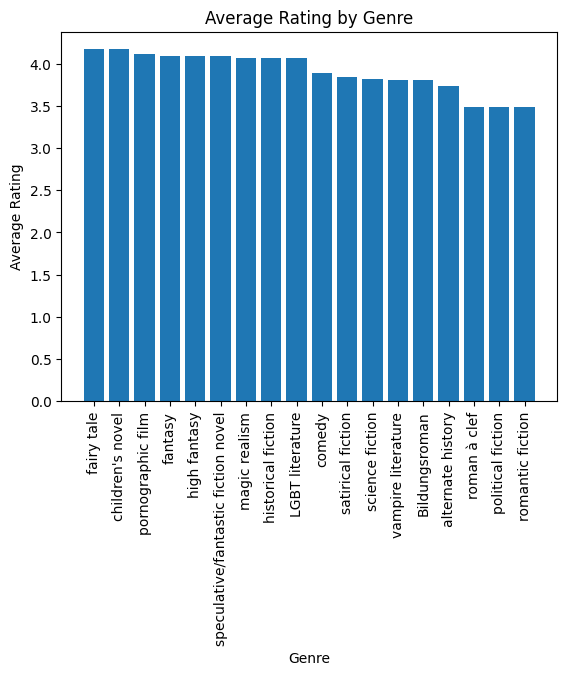

In [54]:
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON

sparql_endpoint ="http://Rumpelstiltskin:7200/repositories/Project"
sparql_query = """
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wod: <https://ecampus.paris-saclay.fr/wod/bhatt/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?bookTitle ?author (xsd:decimal(?ratingsCount) AS ?ratings) (xsd:decimal(?textReviewsCount) / xsd:decimal(?ratingsCount) AS ?reviewRatio) ?bookRating ?genreLabel ?publishedYear
WHERE {
  ?book a wod:Book;
        rdfs:label ?bookTitle;
        wod:authors ?author;
        wod:ratings_count ?ratingsCount;
        wod:average_rating ?bookRating;
        wod:text_reviews_count ?textReviewsCount;
        wod:genre ?genreLabel;
        wod:publicationYear ?publishedYear.

  FILTER(xsd:decimal(?ratingsCount) > 0)
  FILTER(?author != "Stephen King"@en && ?author != "Stephen King/María Mir"@en)  # Exclude specific authors
}
ORDER BY DESC(?bookRating)
"""

#Initializing the SPARQL Wrapper
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)

#Executing the query
results = sparql.query().convert()

# Prepare data for visualization
labels = []
values = []

for result in results["results"]["bindings"]:
    label = result["genreLabel"]["value"]
    value = float(result["bookRating"]["value"])  # Assuming bookRating is a numerical value
    labels.append(label)
    values.append(value)

# Create a histogram 
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre")
plt.show()



#### To visualize the results, much more efficiently, without, executing the query over and over again, I will store the results of the query in a dataframe and use that to discuss the plots, and their inference.

In [55]:
data_list = []

for result in results["results"]["bindings"]:
    row = {
        "Title": result["bookTitle"]["value"],
        "Author": result["author"]["value"],
        "Ratings": result["ratings"]["value"],
        "Review Ratio": result["reviewRatio"]["value"],
        "Book Rating": result["bookRating"]["value"],
        "Genre": result["genreLabel"]["value"],
        "Published Year": result["publishedYear"]["value"]
    }
    data_list.append(row)

# Convert the list of dictionaries to a Pandas DataFrame
result_df = pd.DataFrame(data_list)

result_df = result_df.sort_values(by='Review Ratio', ascending=False)
result_df.head(15)

,Title,Author,Ratings,Review Ratio,Book Rating,Genre,Published Year
3,Dandelion Wine,Ray Bradbury,676,0.176035502958579881656805,4.09,fantasy,1957
22,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,romantic fiction,2002
21,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,political fiction,2002
20,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,roman à clef,2002
19,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,romantic fiction,1986
18,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,political fiction,1986
17,Answered Prayers,Truman Capote,102,0.166666666666666666666667,3.49,roman à clef,1986
15,The Years of Rice and Salt,Kim Stanley Robinson,9344,0.106485445205479452054795,3.73,alternate history,2002
1,Charlotte's Web,E.B. White/Garth Williams,223,0.098654708520179372197309,4.17,children's novel,1954
0,Charlotte's Web,E.B. White/Garth Williams,223,0.098654708520179372197309,4.17,fairy tale,1954


In [15]:
import plotly.express as px
import plotly.graph_objects as go

In [56]:
#Heatmap of the genre and publication year, with the color showing the review ratio

fig = px.density_heatmap(result_df, x="Published Year", y="Genre", z="Review Ratio", title="Review Ratio by Genre and Published Year", template='plotly_dark')
fig.show()

Note: 

Some years appear to have a higher concentration of books with significant review ratios, which could imply that books published in those years prompted more reader feedback.

The distribution of colors shows that not all genres are equally represented each year, and some genres only surface in specific time periods, possibly reflecting trends and shifts in publishing or genre popularity over time.

In [37]:
# A box plot of book ratings by genre

fig = px.box(result_df, x="Genre", y="Book Rating", title="Book Ratings by Genre", template='plotly_dark')
fig.show()

Note:

Most genres have a relatively tight interquartile range, suggesting that ratings within a genre are often consistent.

In [41]:
#A box plot of review ratio by genre

fig = px.box(result_df, x="Genre", y="Review Ratio", title="Review Ratio by Genre", template='plotly_dark')
fig.show()

Note:

Some genres show a wide interquartile range in the review ratio, which might suggest varying degrees of reader engagement or a mix of books that only a few or many readers choose to review.

In [42]:
#A histogram of book ratings and review ratio for genre

fig = px.histogram(result_df, x="Book Rating", y="Review Ratio", color="Genre", marginal="rug", hover_data=result_df.columns, title="Book Ratings and Review Ratio by Genre", template='plotly_dark')
fig.show()

Note: 

The visualization suggests there isn't a direct correlation between book ratings and review ratios across genres; high book ratings do not necessarily correspond to high review ratios and vice versa.

Certain genres stand out with higher review ratios, which may indicate higher reader engagement or more polarized opinions prompting readers to leave reviews.

In [44]:
#Stacked Bar Chart or Area Chart of Book Counts by Genre Over Time

fig = px.area(result_df, x="Published Year", y="Book Rating", color="Genre", title="Book Ratings by Genre Over Time", template='plotly_dark')
fig.show()

In [45]:
#Bar Plot of Average Review Ratio by Genre:

fig = px.bar(result_df, x="Genre", y="Review Ratio", title="Average Review Ratio by Genre", template='plotly_dark')
fig.show()

### Conclusion:

In conclusion, there is diversity in both book ratings and review ratios across genres, suggesting that reader engagement and perception of quality are genre-dependent. However, reader engagement, as measured by the review ratio, does not necessarily align with the perceived quality or ratings of books.

Certain genres like political fiction, fantasy, and romance fiction exhibit higher engagement or are more polarizing, leading to a higher review ratio regardless of the average book rating.

The publishing years 1957 [Dandelion Wine], 1986 [Answered Prayers], and 2002 [The Years of Rice and Salt] seem to show a higher concentration of engaged reviews. This could be influenced by cultural trends, significant literary movements, or notable book releases that resonate with readers.

Temporal trends in genre popularity and reader engagement are observable, which could be valuable for publishers and authors when considering market dynamics and historical reader preferences.